# Contoh Implementasi dari Package MSAMSOA

## Daftar Isi
- [Persiapan](#persiapan)
- [Data Lahan](#data)
- [Simulasi](#simulasi)
- [Visualisasi](#visualisasi)

<a name="persiapan"></a>
## Persiapan

Projek baru perlu ditempatkan di folder msamsoa/projek untuk dapat menggunakan package msamsoa sama dengan notebook ini. Sel pada langkah persiapan perlu dijalankan di setiap notebook baru untuk memastikan semua modul sudah di-import dengan baik. Jika ingin membuat notebook di direktori lain, sesuaikan path untuk import module.

Modul ini membutuhkan ffmpeg, untuk pengguna windows, ikuti panduan install ffmpeg dari link berikut:

https://medium.com/@suryadayn/error-requested-moviewriter-ffmpeg-not-available-easy-fix-9d1890a487d3

In [1]:
import sys
sys.path.append("..")

# Modul Data
from msamsoa.utils.example import scenarios

# Modul Simulasi
from msamsoa.algorithm.samsoa import SAMSOA_Problem
from msamsoa.algorithm.zs import ZS_Problem

# Modul Visualisasi
from msamsoa.utils import visualizer

# Modul Pengolahan Data
import numpy as np
import matplotlib.pyplot as plt

<a name="data"></a>
## Data Masukan

Data masukan untuk kedua algoritma adalah matriks **numpy** dengan nilai tiap sel antara 0 atau 1. 0 berarti daerah yang membutuhkan pupuk dan 1 berarti daerah yang membutuhkan pupuk. Beberapa data lahan sudah disediakan dan ada pada modul **utils.example** variable **scenarios**.

In [2]:
scenarios[0] # Terdapat scenario 0 sampai 3

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Matriks lahan skenario juga dapat divisualisasikan dengan **visualizer.showScenarios**. Untuk menampilkan salah satu lahan saja, gunakan **visualizer.showScenarios** dengan argumen list scenario yang mau ditampilkan.

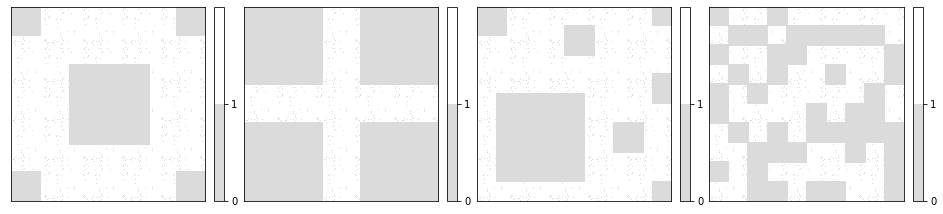

In [3]:
visualizer.showScenarios(scenarios)

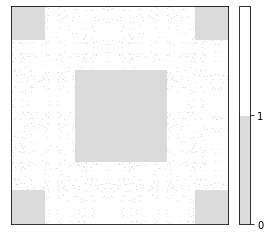

In [4]:
visualizer.showScenarios([scenarios[0]])

Untuk membuat lahan lain bisa menggunakan numpy. Konstruksi matrik dengan ukuran 100 x 100 dan atur daerah mana saja yang membutuhkan pupuk (beri nilai 0) dan tidak butuh pupuk (beri nilai 1).

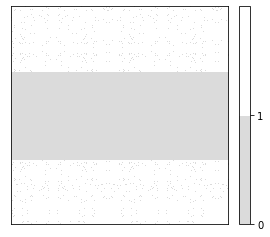

In [5]:
new_scenario = np.zeros((100, 100), np.uint8)

# Konstruksi lahan
new_scenario[:31] = 1
new_scenario[70:] = 1

visualizer.showScenarios([new_scenario])

<a name="simulasi"></a>
## Simulasi

Simulasi dari modul msasmsoa terdiri dari:
- **SAMSOA**, implementasi SAMSOA untuk surveillance dan pemupukan lahan pertanian
- **ZS**, implementasi metode surveillance zig-zag dan pempukan lokal lahan pertanian

**SAMSOA**

Masukan dari simulasi antara lain:

|Parameter|Tipe|Deskripsi|
|:---|:---|:---|
|env|*numpy.array*| matriks dari lahan skenario|
|na|*int*; (max 10)|jumlah UAV yang digunakan|
|a|*float*; {0, 1} (default=0.7)|nilai alpha atau derajat kepentingan nilai feromon|
|b|*float*; {0, 1} (default=0.3)| nilai beta atau derajat kepentingan nilai heuristik|
|d|*int*; (default=80)| dampak jarak terhadap update feromon global|
|dtl0|*float*; (default=0.1)|koefisien perubahan nilai feromon lokal|
|dtg0|*float*; (default=1.0)|koefisien perubahan nilai feromon global|
|ht|*int*; (default=10)| batas iterasi UAV untuk dapat masuk ke hungry state| 

Secara default, simulasi dapat dijalankan hanya dengan menentukan skenario dan jumlah UAV yang digunakan.

Untuk menjalankan simulasi, digunakan method **execute**. Log dari simulasi dapat ditentukan parameter **show** {0, 1, 2} dengan 0 paling sederhana dan 2 paling lengkap (default: 0). Jumlah iterasi maksimal juga dapat dibatasi dengan **max_iteration** (default: inf).

In [6]:
samsoa = SAMSOA_Problem(scenarios[0], 6)
samsoa.execute(show=1)

Iteration 1. Srate: 1.20%. Frate: 0.00%
Iteration 2. Srate: 1.60%. Frate: 0.08%
Iteration 3. Srate: 2.20%. Frate: 0.08%
Iteration 4. Srate: 2.60%. Frate: 0.15%
Iteration 5. Srate: 3.20%. Frate: 0.15%
Iteration 6. Srate: 3.60%. Frate: 0.23%
Iteration 7. Srate: 4.10%. Frate: 0.27%
Iteration 8. Srate: 4.50%. Frate: 0.35%
Iteration 9. Srate: 5.00%. Frate: 0.39%
Iteration 10. Srate: 5.40%. Frate: 0.46%
Iteration 11. Srate: 5.90%. Frate: 0.50%
Iteration 12. Srate: 6.30%. Frate: 0.58%
Iteration 13. Srate: 6.80%. Frate: 0.62%
Iteration 14. Srate: 7.20%. Frate: 0.70%
Iteration 15. Srate: 7.70%. Frate: 0.74%
Iteration 16. Srate: 8.10%. Frate: 0.81%
Iteration 17. Srate: 8.50%. Frate: 0.89%
Iteration 18. Srate: 8.85%. Frate: 0.97%
Iteration 19. Srate: 9.25%. Frate: 1.05%
Iteration 20. Srate: 9.63%. Frate: 1.12%
Iteration 21. Srate:10.03%. Frate: 1.20%
Iteration 22. Srate:10.41%. Frate: 1.28%
Iteration 23. Srate:10.81%. Frate: 1.36%
Iteration 24. Srate:11.09%. Frate: 1.47%
Iteration 25. Srate:11.49

Iteration 199. Srate:40.03%. Frate:17.94%
Iteration 200. Srate:40.05%. Frate:18.09%
Iteration 201. Srate:40.17%. Frate:18.13%
Iteration 202. Srate:40.17%. Frate:18.29%
Iteration 203. Srate:40.27%. Frate:18.33%
Iteration 204. Srate:40.31%. Frate:18.48%
Iteration 205. Srate:40.43%. Frate:18.52%
Iteration 206. Srate:40.43%. Frate:18.67%
Iteration 207. Srate:40.53%. Frate:18.71%
Iteration 208. Srate:40.53%. Frate:18.87%
Iteration 209. Srate:40.63%. Frate:18.91%
Iteration 210. Srate:40.63%. Frate:19.06%
Iteration 211. Srate:40.73%. Frate:19.10%
Iteration 212. Srate:40.73%. Frate:19.22%
Iteration 213. Srate:40.83%. Frate:19.26%
Iteration 214. Srate:40.83%. Frate:19.37%
Iteration 215. Srate:40.95%. Frate:19.41%
Iteration 216. Srate:40.97%. Frate:19.53%
Iteration 217. Srate:41.09%. Frate:19.57%
Iteration 218. Srate:41.10%. Frate:19.68%
Iteration 219. Srate:41.22%. Frate:19.72%
Iteration 220. Srate:41.24%. Frate:19.84%
Iteration 221. Srate:41.36%. Frate:19.88%
Iteration 222. Srate:41.38%. Frate

Iteration 402. Srate:65.19%. Frate:35.10%
Iteration 403. Srate:65.37%. Frate:35.18%
Iteration 404. Srate:65.47%. Frate:35.26%
Iteration 405. Srate:65.65%. Frate:35.34%
Iteration 406. Srate:65.75%. Frate:35.41%
Iteration 407. Srate:65.93%. Frate:35.49%
Iteration 408. Srate:66.03%. Frate:35.57%
Iteration 409. Srate:66.21%. Frate:35.65%
Iteration 410. Srate:66.31%. Frate:35.72%
Iteration 411. Srate:66.45%. Frate:35.80%
Iteration 412. Srate:66.55%. Frate:35.88%
Iteration 413. Srate:66.73%. Frate:35.96%
Iteration 414. Srate:66.83%. Frate:36.03%
Iteration 415. Srate:67.06%. Frate:36.11%
Iteration 416. Srate:67.18%. Frate:36.19%
Iteration 417. Srate:67.38%. Frate:36.27%
Iteration 418. Srate:67.50%. Frate:36.34%
Iteration 419. Srate:67.70%. Frate:36.42%
Iteration 420. Srate:67.80%. Frate:36.50%
Iteration 421. Srate:67.98%. Frate:36.57%
Iteration 422. Srate:68.13%. Frate:36.65%
Iteration 423. Srate:68.33%. Frate:36.73%
Iteration 424. Srate:68.45%. Frate:36.81%
Iteration 425. Srate:68.65%. Frate

Iteration 605. Srate:89.21%. Frate:47.77%
Iteration 606. Srate:89.21%. Frate:47.93%
Iteration 607. Srate:89.31%. Frate:47.97%
Iteration 608. Srate:89.31%. Frate:48.12%
Iteration 609. Srate:89.41%. Frate:48.16%
Iteration 610. Srate:89.41%. Frate:48.31%
Iteration 611. Srate:89.51%. Frate:48.35%
Iteration 612. Srate:89.51%. Frate:48.51%
Iteration 613. Srate:89.61%. Frate:48.55%
Iteration 614. Srate:89.61%. Frate:48.70%
Iteration 615. Srate:89.71%. Frate:48.74%
Iteration 616. Srate:89.71%. Frate:48.90%
Iteration 617. Srate:89.81%. Frate:48.93%
Iteration 618. Srate:89.81%. Frate:49.09%
Iteration 619. Srate:89.91%. Frate:49.17%
Iteration 620. Srate:89.91%. Frate:49.32%
Iteration 621. Srate:90.01%. Frate:49.40%
Iteration 622. Srate:90.01%. Frate:49.55%
Iteration 623. Srate:90.11%. Frate:49.63%
Iteration 624. Srate:90.11%. Frate:49.79%
Iteration 625. Srate:90.21%. Frate:49.86%
Iteration 626. Srate:90.21%. Frate:50.02%
Iteration 627. Srate:90.31%. Frate:50.10%
Iteration 628. Srate:90.31%. Frate

Iteration 803. Srate:90.95%. Frate:70.48%
Iteration 804. Srate:90.95%. Frate:70.67%
Iteration 805. Srate:90.95%. Frate:70.71%
Iteration 806. Srate:90.95%. Frate:70.90%
Iteration 807. Srate:90.95%. Frate:70.94%
Iteration 808. Srate:90.95%. Frate:71.14%
Iteration 809. Srate:90.95%. Frate:71.17%
Iteration 810. Srate:90.95%. Frate:71.37%
Iteration 811. Srate:90.95%. Frate:71.41%
Iteration 812. Srate:90.95%. Frate:71.60%
Iteration 813. Srate:90.95%. Frate:71.64%
Iteration 814. Srate:90.95%. Frate:71.83%
Iteration 815. Srate:90.95%. Frate:71.87%
Iteration 816. Srate:90.95%. Frate:72.07%
Iteration 817. Srate:90.95%. Frate:72.10%
Iteration 818. Srate:90.95%. Frate:72.30%
Iteration 819. Srate:90.95%. Frate:72.34%
Iteration 820. Srate:90.95%. Frate:72.53%
Iteration 821. Srate:90.95%. Frate:72.57%
Iteration 822. Srate:90.95%. Frate:72.76%
Iteration 823. Srate:90.95%. Frate:72.80%
Iteration 824. Srate:90.95%. Frate:72.99%
Iteration 825. Srate:90.95%. Frate:73.03%
Iteration 826. Srate:90.95%. Frate

Iteration 1004. Srate:94.18%. Frate:89.11%
Iteration 1005. Srate:94.20%. Frate:89.11%
Iteration 1006. Srate:94.22%. Frate:89.23%
Iteration 1007. Srate:94.26%. Frate:89.23%
Iteration 1008. Srate:94.30%. Frate:89.35%
Iteration 1009. Srate:94.34%. Frate:89.35%
Iteration 1010. Srate:94.38%. Frate:89.46%
Iteration 1011. Srate:94.42%. Frate:89.46%
Iteration 1012. Srate:94.46%. Frate:89.58%
Iteration 1013. Srate:94.50%. Frate:89.58%
Iteration 1014. Srate:94.54%. Frate:89.66%
Iteration 1015. Srate:94.58%. Frate:89.69%
Iteration 1016. Srate:94.62%. Frate:89.77%
Iteration 1017. Srate:94.70%. Frate:89.81%
Iteration 1018. Srate:94.82%. Frate:89.85%
Iteration 1019. Srate:94.94%. Frate:89.89%
Iteration 1020. Srate:95.08%. Frate:89.93%
Iteration 1021. Srate:95.22%. Frate:89.97%
Iteration 1022. Srate:95.36%. Frate:90.00%
Iteration 1023. Srate:95.50%. Frate:90.04%
Iteration 1024. Srate:95.65%. Frate:90.08%
Iteration 1025. Srate:95.79%. Frate:90.12%
Iteration 1026. Srate:95.93%. Frate:90.16%
Iteration 1

Iteration 1196. Srate:99.23%. Frate:97.09%
Iteration 1197. Srate:99.25%. Frate:97.17%
Iteration 1198. Srate:99.27%. Frate:97.17%
Iteration 1199. Srate:99.29%. Frate:97.21%
Iteration 1200. Srate:99.31%. Frate:97.21%
Iteration 1201. Srate:99.32%. Frate:97.25%
Iteration 1202. Srate:99.32%. Frate:97.29%
Iteration 1203. Srate:99.32%. Frate:97.33%
Iteration 1204. Srate:99.32%. Frate:97.37%
Iteration 1205. Srate:99.32%. Frate:97.40%
Iteration 1206. Srate:99.32%. Frate:97.44%
Iteration 1207. Srate:99.32%. Frate:97.48%
Iteration 1208. Srate:99.32%. Frate:97.52%
Iteration 1209. Srate:99.32%. Frate:97.52%
Iteration 1210. Srate:99.32%. Frate:97.52%
Iteration 1211. Srate:99.32%. Frate:97.56%
Iteration 1212. Srate:99.32%. Frate:97.56%
Iteration 1213. Srate:99.32%. Frate:97.60%
Iteration 1214. Srate:99.32%. Frate:97.64%
Iteration 1215. Srate:99.32%. Frate:97.68%
Iteration 1216. Srate:99.32%. Frate:97.71%
Iteration 1217. Srate:99.32%. Frate:97.71%
Iteration 1218. Srate:99.32%. Frate:97.79%
Iteration 1

**ZS**

Masukan dari simulasi antara lain:

|Parameter|Tipe|Deskripsi|
|:---|:---|:---|
|env|*numpy.array*| matriks dari lahan skenario|
|na|*int*; (max 10)|jumlah UAV yang digunakan|

Parameter dan method untuk menjalankan simulasi dengan ZS sama dengan SAMSOA.

In [7]:
zs = ZS_Problem(scenarios[0], 6)
zs.execute(show=1)

Iteration 1. Srate: 0.90%. Frate: 0.00%
Iteration 2. Srate: 1.40%. Frate: 0.04%
Iteration 3. Srate: 1.90%. Frate: 0.04%
Iteration 4. Srate: 2.40%. Frate: 0.08%
Iteration 5. Srate: 2.90%. Frate: 0.08%
Iteration 6. Srate: 3.40%. Frate: 0.12%
Iteration 7. Srate: 3.90%. Frate: 0.12%
Iteration 8. Srate: 4.40%. Frate: 0.15%
Iteration 9. Srate: 4.90%. Frate: 0.15%
Iteration 10. Srate: 5.40%. Frate: 0.19%
Iteration 11. Srate: 5.90%. Frate: 0.19%
Iteration 12. Srate: 6.40%. Frate: 0.23%
Iteration 13. Srate: 6.90%. Frate: 0.23%
Iteration 14. Srate: 7.40%. Frate: 0.27%
Iteration 15. Srate: 7.90%. Frate: 0.27%
Iteration 16. Srate: 8.10%. Frate: 0.31%
Iteration 17. Srate: 8.30%. Frate: 0.31%
Iteration 18. Srate: 8.50%. Frate: 0.35%
Iteration 19. Srate: 8.70%. Frate: 0.46%
Iteration 20. Srate: 8.90%. Frate: 0.50%
Iteration 21. Srate: 9.10%. Frate: 0.62%
Iteration 22. Srate: 9.30%. Frate: 0.66%
Iteration 23. Srate: 9.50%. Frate: 0.77%
Iteration 24. Srate: 9.70%. Frate: 0.81%
Iteration 25. Srate: 9.90

Iteration 288. Srate:35.20%. Frate:23.09%
Iteration 289. Srate:35.20%. Frate:23.13%
Iteration 290. Srate:35.20%. Frate:23.29%
Iteration 291. Srate:35.20%. Frate:23.36%
Iteration 292. Srate:35.20%. Frate:23.52%
Iteration 293. Srate:35.20%. Frate:23.60%
Iteration 294. Srate:35.20%. Frate:23.75%
Iteration 295. Srate:35.20%. Frate:23.79%
Iteration 296. Srate:35.60%. Frate:23.79%
Iteration 297. Srate:35.60%. Frate:23.83%
Iteration 298. Srate:35.60%. Frate:23.98%
Iteration 299. Srate:35.60%. Frate:24.02%
Iteration 300. Srate:35.60%. Frate:24.18%
Iteration 301. Srate:35.60%. Frate:24.22%
Iteration 302. Srate:35.70%. Frate:24.37%
Iteration 303. Srate:35.70%. Frate:24.41%
Iteration 304. Srate:35.70%. Frate:24.56%
Iteration 305. Srate:35.70%. Frate:24.64%
Iteration 306. Srate:35.70%. Frate:24.80%
Iteration 307. Srate:35.70%. Frate:24.87%
Iteration 308. Srate:35.70%. Frate:25.03%
Iteration 309. Srate:35.80%. Frate:25.03%
Iteration 310. Srate:35.80%. Frate:25.18%
Iteration 311. Srate:35.80%. Frate

Iteration 496. Srate:48.62%. Frate:40.88%
Iteration 497. Srate:48.92%. Frate:40.91%
Iteration 498. Srate:49.22%. Frate:40.95%
Iteration 499. Srate:49.52%. Frate:40.99%
Iteration 500. Srate:49.94%. Frate:40.99%
Iteration 501. Srate:50.24%. Frate:41.03%
Iteration 502. Srate:50.54%. Frate:41.07%
Iteration 503. Srate:50.84%. Frate:41.11%
Iteration 504. Srate:51.14%. Frate:41.15%
Iteration 505. Srate:51.14%. Frate:41.19%
Iteration 506. Srate:51.14%. Frate:41.34%
Iteration 507. Srate:51.14%. Frate:41.38%
Iteration 508. Srate:51.14%. Frate:41.57%
Iteration 509. Srate:51.14%. Frate:41.61%
Iteration 510. Srate:51.14%. Frate:41.81%
Iteration 511. Srate:51.14%. Frate:41.84%
Iteration 512. Srate:51.14%. Frate:42.00%
Iteration 513. Srate:51.24%. Frate:42.00%
Iteration 514. Srate:51.26%. Frate:42.12%
Iteration 515. Srate:51.26%. Frate:42.15%
Iteration 516. Srate:51.26%. Frate:42.27%
Iteration 517. Srate:51.26%. Frate:42.31%
Iteration 518. Srate:51.26%. Frate:42.43%
Iteration 519. Srate:51.26%. Frate

Iteration 716. Srate:63.14%. Frate:58.16%
Iteration 717. Srate:63.14%. Frate:58.19%
Iteration 718. Srate:63.14%. Frate:58.39%
Iteration 719. Srate:63.14%. Frate:58.43%
Iteration 720. Srate:63.14%. Frate:58.62%
Iteration 721. Srate:63.14%. Frate:58.66%
Iteration 722. Srate:63.14%. Frate:58.78%
Iteration 723. Srate:63.14%. Frate:58.81%
Iteration 724. Srate:63.41%. Frate:58.81%
Iteration 725. Srate:63.41%. Frate:58.85%
Iteration 726. Srate:63.41%. Frate:58.93%
Iteration 727. Srate:63.41%. Frate:58.97%
Iteration 728. Srate:63.51%. Frate:59.09%
Iteration 729. Srate:63.51%. Frate:59.12%
Iteration 730. Srate:63.51%. Frate:59.28%
Iteration 731. Srate:63.51%. Frate:59.32%
Iteration 732. Srate:63.51%. Frate:59.47%
Iteration 733. Srate:63.61%. Frate:59.51%
Iteration 734. Srate:63.61%. Frate:59.67%
Iteration 735. Srate:63.61%. Frate:59.71%
Iteration 736. Srate:63.61%. Frate:59.86%
Iteration 737. Srate:63.63%. Frate:59.90%
Iteration 738. Srate:63.65%. Frate:59.98%
Iteration 739. Srate:63.67%. Frate

Iteration 915. Srate:75.29%. Frate:72.96%
Iteration 916. Srate:75.41%. Frate:73.03%
Iteration 917. Srate:75.53%. Frate:73.07%
Iteration 918. Srate:75.65%. Frate:73.15%
Iteration 919. Srate:75.77%. Frate:73.19%
Iteration 920. Srate:75.89%. Frate:73.27%
Iteration 921. Srate:76.01%. Frate:73.30%
Iteration 922. Srate:76.33%. Frate:73.30%
Iteration 923. Srate:76.45%. Frate:73.34%
Iteration 924. Srate:76.57%. Frate:73.42%
Iteration 925. Srate:76.69%. Frate:73.46%
Iteration 926. Srate:76.81%. Frate:73.54%
Iteration 927. Srate:76.93%. Frate:73.58%
Iteration 928. Srate:77.05%. Frate:73.65%
Iteration 929. Srate:77.17%. Frate:73.69%
Iteration 930. Srate:77.29%. Frate:73.77%
Iteration 931. Srate:77.41%. Frate:73.81%
Iteration 932. Srate:77.53%. Frate:73.89%
Iteration 933. Srate:77.65%. Frate:73.92%
Iteration 934. Srate:77.77%. Frate:74.00%
Iteration 935. Srate:77.89%. Frate:74.04%
Iteration 936. Srate:78.01%. Frate:74.12%
Iteration 937. Srate:78.23%. Frate:74.12%
Iteration 938. Srate:78.35%. Frate

Iteration 1142. Srate:92.08%. Frate:85.70%
Iteration 1143. Srate:92.10%. Frate:85.70%
Iteration 1144. Srate:92.12%. Frate:85.82%
Iteration 1145. Srate:92.14%. Frate:85.82%
Iteration 1146. Srate:92.16%. Frate:85.94%
Iteration 1147. Srate:92.18%. Frate:85.94%
Iteration 1148. Srate:92.25%. Frate:86.01%
Iteration 1149. Srate:92.27%. Frate:86.01%
Iteration 1150. Srate:92.29%. Frate:86.09%
Iteration 1151. Srate:92.31%. Frate:86.09%
Iteration 1152. Srate:92.33%. Frate:86.21%
Iteration 1153. Srate:92.35%. Frate:86.21%
Iteration 1154. Srate:92.37%. Frate:86.32%
Iteration 1155. Srate:92.39%. Frate:86.32%
Iteration 1156. Srate:92.41%. Frate:86.44%
Iteration 1157. Srate:92.43%. Frate:86.44%
Iteration 1158. Srate:92.45%. Frate:86.56%
Iteration 1159. Srate:92.47%. Frate:86.56%
Iteration 1160. Srate:92.49%. Frate:86.67%
Iteration 1161. Srate:92.50%. Frate:86.67%
Iteration 1162. Srate:92.50%. Frate:86.75%
Iteration 1163. Srate:92.50%. Frate:86.75%
Iteration 1164. Srate:92.70%. Frate:86.75%
Iteration 1

Iteration 1384. Srate:94.70%. Frate:94.50%
Iteration 1385. Srate:94.70%. Frate:94.50%
Iteration 1386. Srate:94.70%. Frate:94.58%
Iteration 1387. Srate:94.70%. Frate:94.58%
Iteration 1388. Srate:94.70%. Frate:94.65%
Iteration 1389. Srate:94.70%. Frate:94.65%
Iteration 1390. Srate:94.70%. Frate:94.73%
Iteration 1391. Srate:94.70%. Frate:94.73%
Iteration 1392. Srate:94.70%. Frate:94.81%
Iteration 1393. Srate:94.70%. Frate:94.81%
Iteration 1394. Srate:94.70%. Frate:94.89%
Iteration 1395. Srate:94.70%. Frate:94.89%
Iteration 1396. Srate:94.70%. Frate:94.96%
Iteration 1397. Srate:94.70%. Frate:94.96%
Iteration 1398. Srate:94.70%. Frate:95.04%
Iteration 1399. Srate:94.70%. Frate:95.04%
Iteration 1400. Srate:94.70%. Frate:95.12%
Iteration 1401. Srate:94.70%. Frate:95.12%
Iteration 1402. Srate:94.70%. Frate:95.20%
Iteration 1403. Srate:94.70%. Frate:95.20%
Iteration 1404. Srate:94.70%. Frate:95.27%
Iteration 1405. Srate:94.70%. Frate:95.27%
Iteration 1406. Srate:94.90%. Frate:95.27%
Iteration 1

Iteration 1622. Srate:99.02%. Frate:98.37%
Iteration 1623. Srate:99.02%. Frate:98.37%
Iteration 1624. Srate:99.02%. Frate:98.37%
Iteration 1625. Srate:99.02%. Frate:98.37%
Iteration 1626. Srate:99.02%. Frate:98.37%
Iteration 1627. Srate:99.02%. Frate:98.37%
Iteration 1628. Srate:99.02%. Frate:98.45%
Iteration 1629. Srate:99.02%. Frate:98.45%
Iteration 1630. Srate:99.02%. Frate:98.53%
Iteration 1631. Srate:99.02%. Frate:98.53%
Iteration 1632. Srate:99.02%. Frate:98.53%
Iteration 1633. Srate:99.02%. Frate:98.53%
Iteration 1634. Srate:99.06%. Frate:98.53%
Iteration 1635. Srate:99.06%. Frate:98.53%
Iteration 1636. Srate:99.06%. Frate:98.53%
Iteration 1637. Srate:99.06%. Frate:98.53%
Iteration 1638. Srate:99.06%. Frate:98.53%
Iteration 1639. Srate:99.06%. Frate:98.53%
Iteration 1640. Srate:99.06%. Frate:98.53%
Iteration 1641. Srate:99.06%. Frate:98.53%
Iteration 1642. Srate:99.06%. Frate:98.61%
Iteration 1643. Srate:99.06%. Frate:98.61%
Iteration 1644. Srate:99.06%. Frate:98.68%
Iteration 1

Hasil perkembangan dari simulasi dapat dilihat pada Tracker yang ada di tiap kelas.

- ts = waktu total surveillance
- tf = waktu total pemupukan

In [8]:
ts_samsoa = samsoa.tracker.ts
tf_samsoa = samsoa.tracker.tf

ts_zs = zs.tracker.ts
tf_zs = zs.tracker.tf

print("SAMSOA")
print("Waktu Surveillance : {:4} iterasi".format(ts_samsoa))
print("Waktu Pemupukan    : {:4} iterasi".format(tf_samsoa))
print("=================================")
print("ZS")
print("Waktu Surveillance : {:4} iterasi".format(ts_zs))
print("Waktu Pemupukan    : {:4} iterasi".format(tf_zs))

SAMSOA
Waktu Surveillance : 1326 iterasi
Waktu Pemupukan    : 1296 iterasi
ZS
Waktu Surveillance : 1786 iterasi
Waktu Pemupukan    : 1768 iterasi


<a name="visualisasi"></a>
## Visualisasi

Pembuatan visulisasi akan menggunakan fungsi dari **visualizer**:
1. **generateSimulationFertilized()** : fungsi untuk membuat visualisasi dengan menampilkan perkmebangan daerah yang telah dipupuk.
2. **generateSimulationVisited()** : fungsi untuk membuat simulasi dengan menampilkan perkembangan daerah yang telah dikunjungi.

Kedua fungsi memiliki argumen yang sama, yaitu tracker dari kedua simulasi yang sudah dibuat. Namun simulasi yang dibuat harus dijalankan dengan parameter **simulation=True** pada method **execute**. Parameter ini membuat **tracker** mencatat semua perubahan posisi UAV dan perkembangan penyelesaian misi. Hanya atur **simulation=True** pada saat ingin membuat visualisasi. Parameter ini membuat ekseskusi simulasi memakan memori yang sangat besar dan berpotensi memberatkan memori.

In [18]:
samsoa_viz = SAMSOA_Problem(scenarios[0], 6)
samsoa_viz.execute(show=1, simulation=True, max_iteration=50)

Iteration 1. Srate: 1.20%. Frate: 0.00%
Iteration 2. Srate: 1.60%. Frate: 0.08%
Iteration 3. Srate: 2.20%. Frate: 0.08%
Iteration 4. Srate: 2.60%. Frate: 0.15%
Iteration 5. Srate: 3.10%. Frate: 0.19%
Iteration 6. Srate: 3.40%. Frate: 0.31%
Iteration 7. Srate: 3.86%. Frate: 0.35%
Iteration 8. Srate: 4.16%. Frate: 0.46%
Iteration 9. Srate: 4.58%. Frate: 0.50%
Iteration 10. Srate: 4.88%. Frate: 0.62%
Iteration 11. Srate: 5.32%. Frate: 0.66%
Iteration 12. Srate: 5.62%. Frate: 0.77%
Iteration 13. Srate: 6.06%. Frate: 0.81%
Iteration 14. Srate: 6.36%. Frate: 0.93%
Iteration 15. Srate: 6.84%. Frate: 0.97%
Iteration 16. Srate: 7.14%. Frate: 1.08%
Iteration 17. Srate: 7.52%. Frate: 1.16%
Iteration 18. Srate: 7.82%. Frate: 1.28%
Iteration 19. Srate: 8.04%. Frate: 1.39%
Iteration 20. Srate: 8.34%. Frate: 1.51%
Iteration 21. Srate: 8.58%. Frate: 1.63%
Iteration 22. Srate: 8.88%. Frate: 1.74%
Iteration 23. Srate: 9.12%. Frate: 1.86%
Iteration 24. Srate: 9.42%. Frate: 1.98%
Iteration 25. Srate: 9.61

In [21]:
zs_viz = ZS_Problem(scenarios[0], 6)
zs_viz.execute(show=1, simulation=True, max_iter=50)

Iteration 1. Srate: 0.90%. Frate: 0.00%
Iteration 2. Srate: 1.40%. Frate: 0.04%
Iteration 3. Srate: 1.90%. Frate: 0.04%
Iteration 4. Srate: 2.40%. Frate: 0.08%
Iteration 5. Srate: 2.90%. Frate: 0.08%
Iteration 6. Srate: 3.40%. Frate: 0.12%
Iteration 7. Srate: 3.90%. Frate: 0.12%
Iteration 8. Srate: 4.40%. Frate: 0.15%
Iteration 9. Srate: 4.90%. Frate: 0.15%
Iteration 10. Srate: 5.40%. Frate: 0.19%
Iteration 11. Srate: 5.90%. Frate: 0.19%
Iteration 12. Srate: 6.40%. Frate: 0.23%
Iteration 13. Srate: 6.90%. Frate: 0.23%
Iteration 14. Srate: 7.40%. Frate: 0.27%
Iteration 15. Srate: 7.90%. Frate: 0.27%
Iteration 16. Srate: 8.10%. Frate: 0.31%
Iteration 17. Srate: 8.30%. Frate: 0.31%
Iteration 18. Srate: 8.50%. Frate: 0.35%
Iteration 19. Srate: 8.70%. Frate: 0.46%
Iteration 20. Srate: 8.90%. Frate: 0.50%
Iteration 21. Srate: 9.10%. Frate: 0.62%
Iteration 22. Srate: 9.30%. Frate: 0.66%
Iteration 23. Srate: 9.50%. Frate: 0.77%
Iteration 24. Srate: 9.70%. Frate: 0.81%
Iteration 25. Srate: 9.90

Karena pembuatan simulasi sangat memakan waktu (untuk 500 iterasi bisa mencapai 2 jam), disarankan untuk membuat simulasi dengan membatasi jumlah iterasi. Hal ini dapat dicapai dengan memberi nilai parameter **iteration** sesuai jumlah iterasi yang diinginkan.

In [22]:
visualizer.generateSimulationFertilized(samsoa_viz.tracker, zs_viz.tracker, iteration=50)

Working on iteration...0
Working on iteration...0
Working on iteration...1
Working on iteration...2
Working on iteration...3
Working on iteration...4
Working on iteration...5
Working on iteration...6
Working on iteration...7
Working on iteration...8
Working on iteration...9
Working on iteration...10
Working on iteration...11
Working on iteration...12
Working on iteration...13
Working on iteration...14
Working on iteration...15
Working on iteration...16
Working on iteration...17
Working on iteration...18
Working on iteration...19
Working on iteration...20
Working on iteration...21
Working on iteration...22
Working on iteration...23
Working on iteration...24
Working on iteration...25
Working on iteration...26
Working on iteration...27
Working on iteration...28
Working on iteration...29
Working on iteration...30
Working on iteration...31
Working on iteration...32
Working on iteration...33
Working on iteration...34
Working on iteration...35
Working on iteration...36
Working on iteration...

In [12]:
visualizer.generateSimulationVisited(samsoa_viz.tracker, zs_viz.tracker, iteration=50)

Working on iteration...0
Working on iteration...0
Working on iteration...1
Working on iteration...2
Working on iteration...3
Working on iteration...4
Working on iteration...5
Working on iteration...6
Working on iteration...7
Working on iteration...8
Working on iteration...9
Working on iteration...10
Working on iteration...11
Working on iteration...12
Working on iteration...13
Working on iteration...14
Working on iteration...15
Working on iteration...16
Working on iteration...17
Working on iteration...18
Working on iteration...19
Working on iteration...20
Working on iteration...21
Working on iteration...22
Working on iteration...23
Working on iteration...24
Working on iteration...25
Working on iteration...26
Working on iteration...27
Working on iteration...28
Working on iteration...29
Working on iteration...30
Working on iteration...31
Working on iteration...32
Working on iteration...33
Working on iteration...34
Working on iteration...35
Working on iteration...36
Working on iteration...